# **Question 1** 

### **Part A**
The adjacency matrix looks like,

$A = \begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}$

### **Part B**
Given the features of each node X, graph convolution, 

X' = relu(A*X)

$X' = relu\begin{pmatrix}\begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}*\begin{bmatrix}1&-1\\-2&0.5\\1&3\\0&-1\end{bmatrix}\end{pmatrix}$

$X' = relu\begin{pmatrix}\begin{bmatrix}-1&-0.5\\-1&2.5\\-1&3.5\\2&1
\end{bmatrix}\end{pmatrix}$

$X' = \begin{bmatrix}0&0\\0&2.5\\0&3.5\\2&1
\end{bmatrix}$

### **Part C**

$D=\begin{bmatrix}2&0&0&0\\0&3&0&0\\0&0&2&0\\0&0&0&3
\end{bmatrix}$

$D^{-1}=\begin{bmatrix}\frac{1}{2}&0&0&0\\0&\frac{1}{3}&0&0\\0&0&\frac{1}{2}&0\\0&0&0&\frac{1}{3}
\end{bmatrix}$

$A'=D^{-1}A=\begin{bmatrix}\frac{1}{2}&0&0&0\\0&\frac{1}{3}&0&0\\0&0&\frac{1}{2}&0\\0&0&0&\frac{1}{3}
\end{bmatrix}\begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}$

$A'=\begin{bmatrix}\frac{1}{2}&\frac{1}{2}&0&0\\0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}\\0&\frac{1}{2}&\frac{1}{2}&0\\\frac{1}{3}&0&\frac{1}{3}&\frac{1}{3}
\end{bmatrix}$

Now, we find relu(A'X)

$relu(A'X)=relu\begin{pmatrix}\begin{bmatrix}\frac{1}{2}&\frac{1}{2}&0&0\\0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}\\0&\frac{1}{2}&\frac{1}{2}&0\\\frac{1}{3}&0&\frac{1}{3}&\frac{1}{3}
\end{bmatrix}*\begin{bmatrix}1&-1\\-2&0.5\\1&3\\0&-1\end{bmatrix}\end{pmatrix}$

$relu(A'X)=relu\begin{pmatrix}\begin{bmatrix}-\frac{1}{2}&-\frac{1}{4}\\-\frac{1}{3}&\frac{5}{6}\\-\frac{1}{2}&\frac{7}{4}\\\frac{2}{3}&\frac{1}{3}
\end{bmatrix}\end{pmatrix}$

$relu(A'X)\begin{bmatrix}0&0\\0&\frac{5}{6}\\0&\frac{7}{4}\\\frac{2}{3}&\frac{1}{3}
\end{bmatrix}$





# Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import torch
import torch.nn.functional as F
from torch import nn
from torch.nn import Linear
from torch_geometric.data import Data
import os
from torch_geometric.data import DataLoader

In [2]:
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool

GraphNet(
  (embed): Linear(in_features=37, out_features=500, bias=True)
  (conv1): GCNConv(500, 500)
  (conv2): GCNConv(500, 300)
  (conv3): GCNConv(300, 300)
  (out_layer): Linear(in_features=300, out_features=1, bias=True)
)
Epoch: 1, Train loss: 3.34, Test loss: 2.18
Epoch: 2, Train loss: 2.05, Test loss: 2.2
Epoch: 3, Train loss: 1.59, Test loss: 1.86
Epoch: 4, Train loss: 1.4, Test loss: 1.24
Epoch: 5, Train loss: 1.3, Test loss: 1.05
Epoch: 6, Train loss: 1.17, Test loss: 0.99
Epoch: 7, Train loss: 1.06, Test loss: 1.25
Epoch: 8, Train loss: 1.06, Test loss: 1.03
Epoch: 9, Train loss: 0.975, Test loss: 1.13
Epoch: 10, Train loss: 0.962, Test loss: 0.879
Epoch: 11, Train loss: 0.903, Test loss: 0.917
Epoch: 12, Train loss: 0.865, Test loss: 1.23
Epoch: 13, Train loss: 0.851, Test loss: 1.28
Epoch: 14, Train loss: 0.812, Test loss: 1.05
Epoch: 15, Train loss: 0.835, Test loss: 0.993
Epoch: 16, Train loss: 0.806, Test loss: 0.964
Epoch: 17, Train loss: 0.781, Test loss: 0.832
Epoch

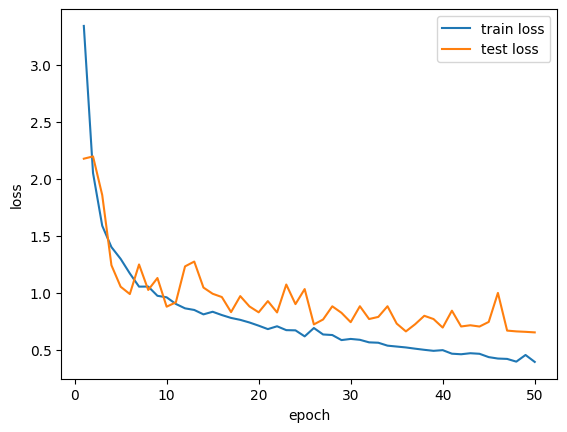

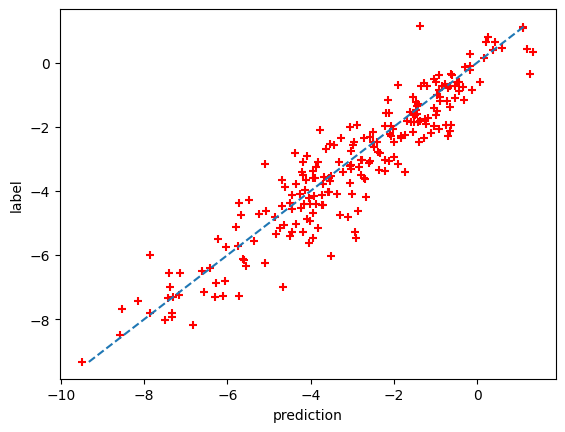

In [4]:
def get_dataset(save_path):
	'''
	read data from .npy file 
	no need to modify this function
	'''
	raw_data = np.load(save_path, allow_pickle=True)
	dataset = []
	for i, (node_f, edge_index, edge_attr, y)in enumerate(raw_data):
		sample = Data(
			x=torch.tensor(node_f, dtype=torch.float),
			y=torch.tensor([y], dtype=torch.float),
			edge_index=torch.tensor(edge_index, dtype=torch.long),
			edge_attr=torch.tensor(edge_attr, dtype=torch.float)
		)
		dataset.append(sample)
	return dataset
	
class GraphNet(nn.Module):
    def __init__(self, n_features):
        '''
        n_features: number of features from dataset, should be 37
        '''
        super(GraphNet, self).__init__()
        self.embed = nn.Linear(n_features, 500)
        self.conv1 = GCNConv(500, 500, normalize=True)
        self.conv2 = GCNConv(500, 300, normalize=True)
        self.conv3 = GCNConv(300, 300, normalize=True)
        self.out_layer = nn.Linear(300, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.embed(x.type(torch.FloatTensor))
        x = F.relu(self.conv1(x, edge_index))
#         x = F.dropout(x, training=self.training,p=0.01)
        x = F.relu(self.conv2(x, edge_index))
#         x = F.dropout(x, training=self.training,p=0.01)
        x = F.relu(self.conv3(x, edge_index))
        x = global_max_pool(x, data.batch)
        return self.out_layer(x)

checkpoint_path = r"C:\Users\javal\Desktop\Spring_23\Intro_to_DL\Assignments\HW_5"

def main():
	# load data and build the data loader
	train_set = get_dataset("train_set.npy")
	test_set = get_dataset("test_set.npy")
	train_loader = DataLoader(train_set, batch_size=1, shuffle=True)
	test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

	# number of features in the dataset
	# no need to change the value
	n_features = 37

	# build your GNN model
	model = GraphNet(n_features)

	# define your loss and optimizer
	loss_func = nn.MSELoss()
	optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

	print(model)

	hist = {"train_loss":[], "test_loss":[]}
	num_epoch = 50

	best_loss = float('inf')
	best_model_state = None

	for epoch in range(1, 1+num_epoch):
		model.train()
		loss_all = 0
		for data in train_loader:
			# your codes for training the model
			# ...
			pred = model(data)
			label = data.y
			loss = loss_func(pred, label)
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
			loss_all += loss.item() * data.num_graphs

		train_loss = loss_all / len(train_set)

		with torch.no_grad():
			loss_all = 0
			for data in test_loader:
				# your codes for validation on test set
				# ...
				model.eval()
				pred = model(data)
				label = data.y
				loss = loss_func(pred, label)
				loss_all += loss.item() * data.num_graphs
			test_loss = loss_all / len(test_set)

			hist["train_loss"].append(train_loss)
			hist["test_loss"].append(test_loss)
			
			print(f'Epoch: {epoch}, Train loss: {train_loss:.3}, Test loss: {test_loss:.3}')
			
			# save model state if current epoch is the best so far
			if test_loss < best_loss:
				best_loss = test_loss
				best_model_state = model.state_dict()
			
			

	# save the best model state
	torch.save(best_model_state, os.path.join(checkpoint_path,'checkpoint'))
	
	saved_model_path = os.path.join(checkpoint_path,'best_model')
	if os.path.exists(saved_model_path):
		best_model_state = torch.load(saved_model_path)
		model.load_state_dict(best_model_state)
		print(f"Loaded best model state from {saved_model_path}")
	
			
	# test on test set to get prediction 
	with torch.no_grad():
		model.eval()
		prediction = np.zeros(len(test_set))
		label = np.zeros(len(test_set))
		idx = 0
		for data in test_loader:
			output = model(data)
			prediction[idx:idx+len(output)] = output.squeeze().detach().numpy()
			label[idx:idx+len(output)] = data.y.detach().numpy()
			idx += len(output)
		prediction = np.array(prediction).squeeze()
		label = np.array(label).squeeze()
		total_mse = np.sum((prediction - label)**2)
		print(f'Total MSE = {total_mse}')

	# visualization
	# plot loss function
	ax = plt.subplot(1,1,1)
	ax.plot([e for e in range(1,1+num_epoch)], hist["train_loss"], label="train loss")
	ax.plot([e for e in range(1,1+num_epoch)], hist["test_loss"], label="test loss")
	plt.xlabel("epoch")
	plt.ylabel("loss")
	ax.legend()
	plt.show()

	# plot prediction vs. label
	x = np.linspace(np.min(label), np.max(label))
	y = np.linspace(np.min(label), np.max(label))
	ax = plt.subplot(1,1,1)
	ax.scatter(prediction, label, marker='+', c='red')
	ax.plot(x, y, '--')
	plt.xlabel("prediction")
	plt.ylabel("label")
	plt.show()


if __name__ == "__main__":
	main()


My final MSE loss is **146.51** with 50 epochs